In [1]:
import os
import pickle
import matplotlib.pyplot as plt                     
import numpy as np                                    
import pandas as pd
from pathlib import Path
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Random forest and boosting packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Data Prep

In [2]:
# Read in Data

# set directory
data_dir = 'C:/Users/630125/Desktop/TEDS/Capstone Project/Jupyer Notebooks'

# read file
df = pd.read_csv(str(data_dir)+'/'+'SBA_prepro.csv', index_col=False)
df = df.drop(columns=['Unnamed: 0', 'Term (Years)'])
df = df.drop(['NumberOfEmployees', 'IsNewBusiness', 'RevLineCr', 'JobsCreated', 'JobsRetained', 'IsFranchise', 'LowDoc', 'ApprovalDate', 'DisbursementDate', 'DisbursementFY', 'State'], axis = 1)

df.head()

,ApprovalFY,Term (Months),DaysToDisbursement,DisbursementGross,GrAppv,SBA_Appv,Portion_SBA_Bank,Region,Industry,UrbanRural,Recession,Default
0,1995,60,59.0,15000.0,15000.0,12000.0,0.80,West,NaN,0,0,False
1,1998,48,47.0,16000.0,16000.0,12800.0,0.80,West,NaN,0,0,False
2,2002,120,26.0,260000.0,260000.0,195000.0,0.75,West,56.0,1,1,False
3,2003,84,44.0,5000.0,5000.0,2500.0,0.50,West,45.0,1,1,False
4,2001,60,136.0,161000.0,100000.0,50000.0,0.50,West,62.0,1,0,False


In [3]:
df.isna().sum()

ApprovalFY                 0
Term (Months)              0
DaysToDisbursement         0
DisbursementGross          0
GrAppv                     0
SBA_Appv                   0
Portion_SBA_Bank           0
Region                     0
Industry              108209
UrbanRural                 0
Recession                  0
Default                    0
dtype: int64

In [4]:
# fill in missing values
def fillna(df):
    # fill numeric columns with mean value
    # df = df.fillna(df.mean())    
    # fill categorical columns with mode value
    df = df.fillna(df.mode().iloc[0])
    return df
  
df = fillna(df)
df.isna().sum()

ApprovalFY            0
Term (Months)         0
DaysToDisbursement    0
DisbursementGross     0
GrAppv                0
SBA_Appv              0
Portion_SBA_Bank      0
Region                0
Industry              0
UrbanRural            0
Recession             0
Default               0
dtype: int64

In [5]:
# split data
X = df.drop(['Default', 'ApprovalFY'], axis = 1)
y = np.array(df['Default'])

X = pd.get_dummies(X, columns = ['Industry', 'Region'], dtype=float, drop_first=True)
X.head()

,Term (Months),DaysToDisbursement,DisbursementGross,GrAppv,SBA_Appv,Portion_SBA_Bank,UrbanRural,Recession,Industry_21.0,Industry_22.0,...,Industry_56.0,Industry_61.0,Industry_62.0,Industry_71.0,Industry_72.0,Industry_81.0,Industry_92.0,Region_Northeast,Region_South,Region_West
0,60,59.0,15000.0,15000.0,12000.0,0.80,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,48,47.0,16000.0,16000.0,12800.0,0.80,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,120,26.0,260000.0,260000.0,195000.0,0.75,1,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,84,44.0,5000.0,5000.0,2500.0,0.50,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,136.0,161000.0,100000.0,50000.0,0.50,1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
# set random seed
np.random.seed(13)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% train; 30% test

# Random Forest

In [7]:
# create random forest classifier
forest = RandomForestClassifier(criterion = 'gini',
                                n_estimators = 100, # number of estimators
                                random_state = 1)

# fit the saved model to your training data
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [8]:
# Predict on test data.
y_predict_forest = forest.predict(X_test)
print(y_predict_forest[0:5,])

# get prediction probabilities
y_predict_prob = forest.predict_proba(X_test) 
print(y_predict_prob[0:5])

[False  True False False False]
[[1.   0.  ]
 [0.15 0.85]
 [0.95 0.05]
 [0.73 0.27]
 [1.   0.  ]]


In [9]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

[[113075   3519]
 [  7252  17757]]


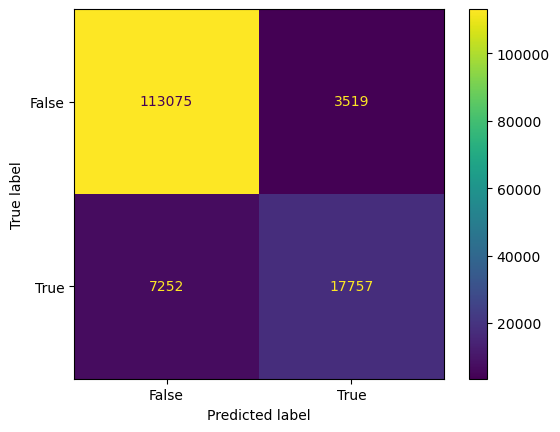

In [10]:
# confusion matrix on test data
conf_matrix_forest = metrics.confusion_matrix(y_test, y_predict_forest)
print(conf_matrix_forest)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_forest,
                              display_labels = forest.classes_)
disp.plot()

plt.show()

In [11]:
# Compute accuracy using training data.
accuracy_forest = forest.score(X_train, y_train)
print ("Train Accuracy:", accuracy_forest)

# compute accuracy on test data
accuracy_forest = metrics.accuracy_score(y_test, y_predict_forest)
print("Test Accuracy: ", accuracy_forest)

Train Accuracy: 0.9997820849626518
Test Accuracy:  0.9239352273610022


In [12]:
def get_performance_scores(y_test, y_predict, y_predict_prob, eps=1e-15, beta=0.5):
    
    from sklearn import metrics
    
    # Scores keys.
    metric_keys = ["accuracy", "precision", "recall", "f1", "fbeta", "log_loss", "AUC"]
    
    # Score values.
    metric_values = [None]*len(metric_keys)
    
    metric_values[0] = metrics.accuracy_score(y_test, y_predict)
    metric_values[1] = metrics.precision_score(y_test, y_predict)
    metric_values[2] = metrics.recall_score(y_test, y_predict)
    metric_values[3] = metrics.f1_score(y_test, y_predict)
    metric_values[4] = metrics.fbeta_score(y_test, y_predict, beta=beta)
    metric_values[5] = metrics.log_loss(y_test, y_predict_prob[:, 1], eps=eps)
    metric_values[6] = metrics.roc_auc_score(y_test, y_predict_prob[:, 1])
    
    perf_metrics = dict(zip(metric_keys, metric_values))
    
    return(perf_metrics)


forest_scores = get_performance_scores(y_test, y_predict_forest, y_predict_prob)
forest_scores

{'accuracy': 0.9239352273610022,
 'precision': 0.8346023688663282,
 'recall': 0.710024391219161,
 'f1': 0.7672896186669547,
 'fbeta': 0.8063080653510485,
 'log_loss': 0.2286452008693684,
 'AUC': 0.9512866324776083}

In [13]:
# get target values
target_names = df['Default'].unique()
# assign to list
target_names = target_names.tolist()
target_names = [str(x) for x in target_names]

# Print an entire classification report.
class_report = metrics.classification_report(y_test, y_predict_forest, target_names = target_names)
print(class_report)

              precision    recall  f1-score   support

       False       0.94      0.97      0.95    116594
        True       0.83      0.71      0.77     25009

    accuracy                           0.92    141603
   macro avg       0.89      0.84      0.86    141603
weighted avg       0.92      0.92      0.92    141603



<Figure size 640x480 with 0 Axes>

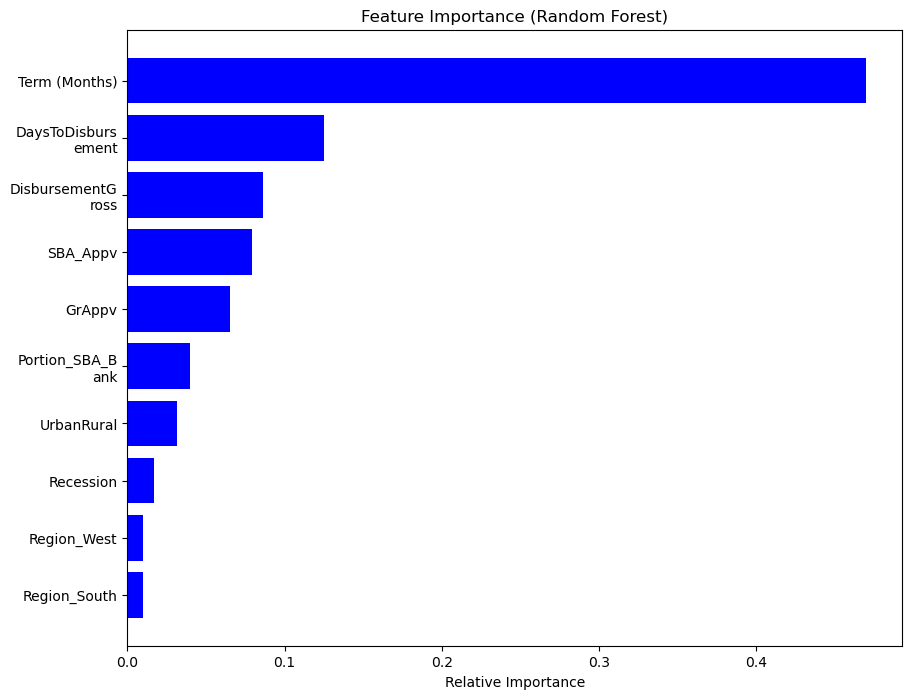

In [14]:
# get column names
features = X.columns
# use feature_importances_ function
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
top_indices = indices[0:10][::-1]

# plot feature importance
plt.figure(1)
plt.figure(figsize = (10, 8))
plt.title('Feature Importance (Random Forest)')
plt.barh(range(len(top_indices)), importances[top_indices], color = 'b', align = 'center')

labels = features[top_indices]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices)), labels)
plt.xlabel('Relative Importance')

plt.show()

C:\Users\630125\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


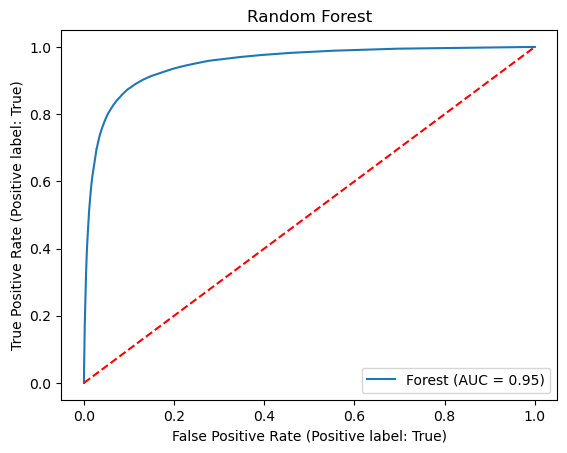

In [15]:
forest_roc = metrics.plot_roc_curve(forest, X_test, y_test, name = "Forest")
plt.legend(loc = 'lower right')
plt.title("Random Forest")
plt.plot([0, 1], [0, 1],'r--')
plt.show()

C:\Users\630125\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


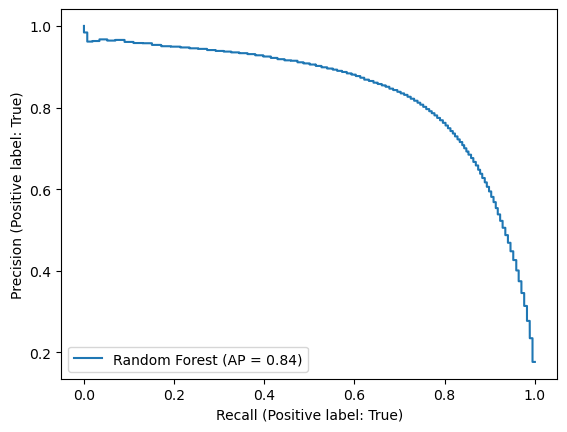

In [16]:
# precision recall
forest_prec_recall = metrics.plot_precision_recall_curve(forest, X_test, y_test, name = "Random Forest")
plt.show()

Overall accuracy: 0.7956107654422103


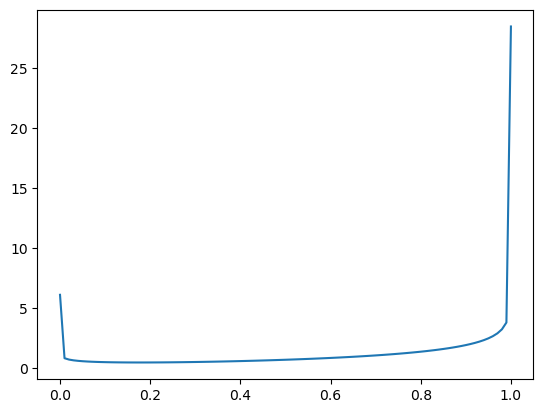

In [17]:
import math

forest_log_loss = forest_scores['log_loss']

# overall accuracy
print("Overall accuracy: {0}".format(math.exp(-forest_log_loss)))

# Probability values: 0 to 1 in 0.01 increments.
prob_increments = [x*0.01 for x in range(0, 101)]

# Loss for predicting different fixed probability values.
losses_ex = [metrics.log_loss(y_test, [y for x in range(len(y_test))]) for y in prob_increments]

# Plot predictions vs loss.
plt.plot(prob_increments, losses_ex)
plt.show()

# Gradient Boosting

In [18]:
# create gradient boosting classifier
gbm = GradientBoostingClassifier(n_estimators = 100,
                                 learning_rate = 1,
                                 max_depth = 1,
                                 random_state = 1)

# fit model to training data
gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=1, random_state=1)

In [19]:
# predict on test data
predicted_values_gbm = gbm.predict(X_test)
print(predicted_values_gbm[0:5,])

# get prediction probabilities
predicted_values_gbm_prob = gbm.predict_proba(X_test) 
print(y_predict_prob[0:5])

[False  True False False False]
[[1.   0.  ]
 [0.15 0.85]
 [0.95 0.05]
 [0.73 0.27]
 [1.   0.  ]]


In [20]:
gbm.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1,
 'loss': 'deviance',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

[[112412   4182]
 [  7243  17766]]


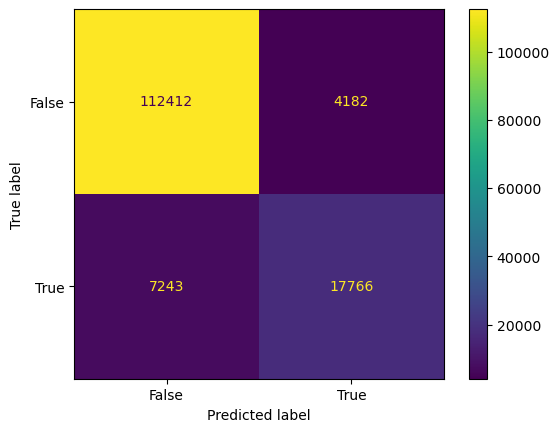

In [21]:
# confusion matrix on test data
conf_matrix_gb = metrics.confusion_matrix(y_test, predicted_values_gbm)
print(conf_matrix_gb)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_gb,
                              display_labels = gbm.classes_)
disp.plot()

plt.show()

In [22]:
# Compute accuracy using training data
train_accuracy_gbm = gbm.score(X_train, y_train)
print ("Train Accuracy:", train_accuracy_gbm)

# compute accuracy using test data
accuracy_gbm = metrics.accuracy_score(y_test, predicted_values_gbm)
print("Test Accuracy: ", accuracy_gbm)

Train Accuracy: 0.9184271376859844
Test Accuracy:  0.9193166811437611


In [23]:
# get target values
target_names = df['Default'].unique()
# assign to list
target_names = target_names.tolist()
target_names = [str(x) for x in target_names]

# Print an entire classification report.
class_report = metrics.classification_report(y_test, predicted_values_gbm, target_names = target_names)
print(class_report)

              precision    recall  f1-score   support

       False       0.94      0.96      0.95    116594
        True       0.81      0.71      0.76     25009

    accuracy                           0.92    141603
   macro avg       0.87      0.84      0.85    141603
weighted avg       0.92      0.92      0.92    141603



In [24]:
gbm_scores = get_performance_scores(y_test, predicted_values_gbm, predicted_values_gbm_prob)
gbm_scores

{'accuracy': 0.9193166811437611,
 'precision': 0.8094587206123565,
 'recall': 0.7103842616658003,
 'f1': 0.7566922929488681,
 'fbeta': 0.7874930186789124,
 'log_loss': 0.22061595425243424,
 'AUC': 0.9406568538665874}

<Figure size 640x480 with 0 Axes>

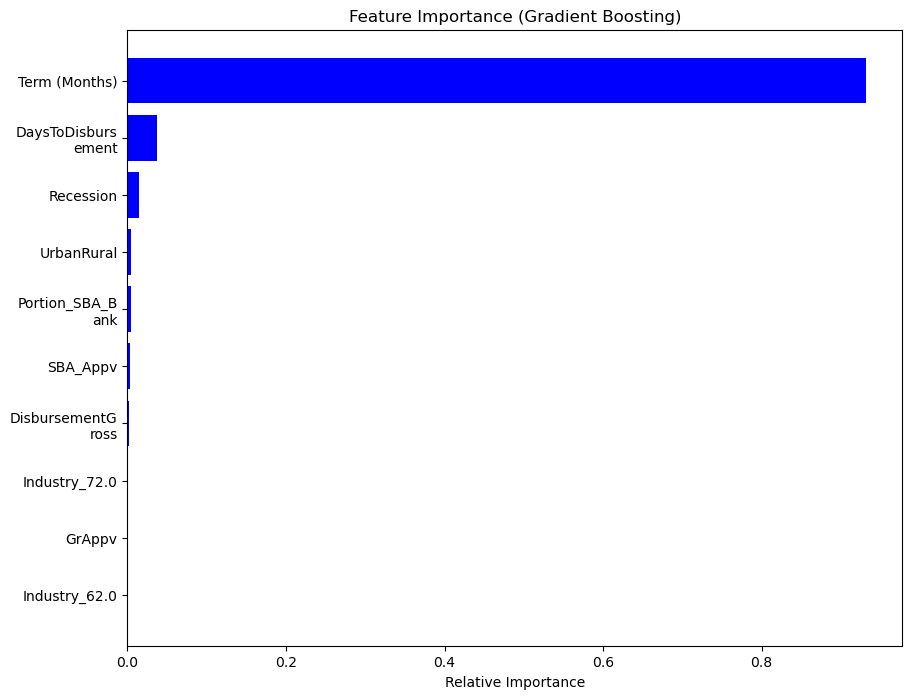

In [25]:
# get column names
features = X.columns
# use feature_importances_ function
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]
top_indices = indices[0:10][::-1]

# plot feature importance
plt.figure(1)
plt.figure(figsize = (10, 8))
plt.title('Feature Importance (Gradient Boosting)')
plt.barh(range(len(top_indices)), importances[top_indices], color = 'b', align = 'center')

labels = features[top_indices]
labels = [ '\n'.join(wrap(l,13)) for l in labels ]
plt.yticks(range(len(top_indices)), labels)
plt.xlabel('Relative Importance')

plt.show()

C:\Users\630125\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


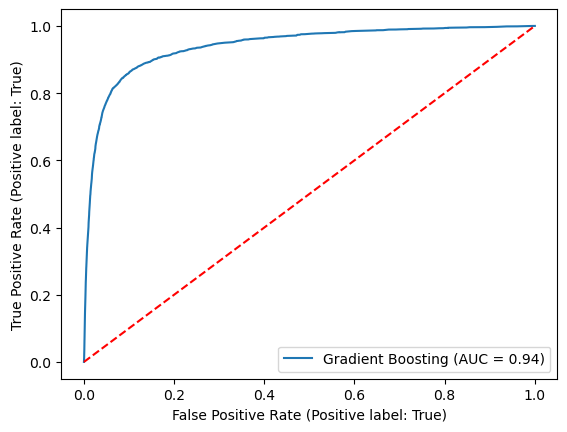

In [26]:
gbm_roc = metrics.plot_roc_curve(gbm, X_test, y_test, name = "Gradient Boosting")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.show()

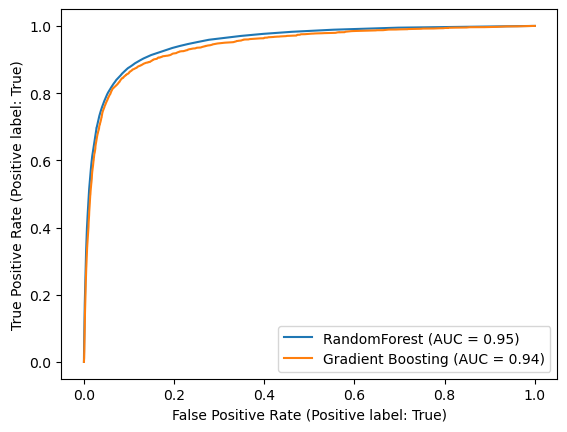

In [27]:
ax = plt.gca()
forest_roc.plot(ax = ax, name = "RandomForest")
gbm_roc.plot(ax = ax, name = "Gradient Boosting")

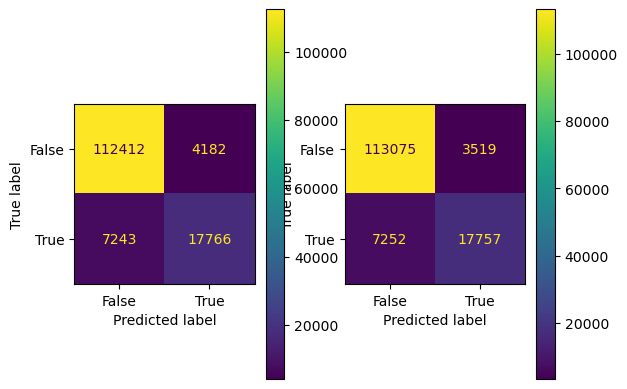

In [28]:
fig, ax = plt.subplots(1,2)

metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix_gb, display_labels = gbm.classes_).plot(ax=ax[0])

metrics.ConfusionMatrixDisplay(
    confusion_matrix = conf_matrix_forest, 
    display_labels = forest.classes_).plot(ax=ax[1]);

C:\Users\630125\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


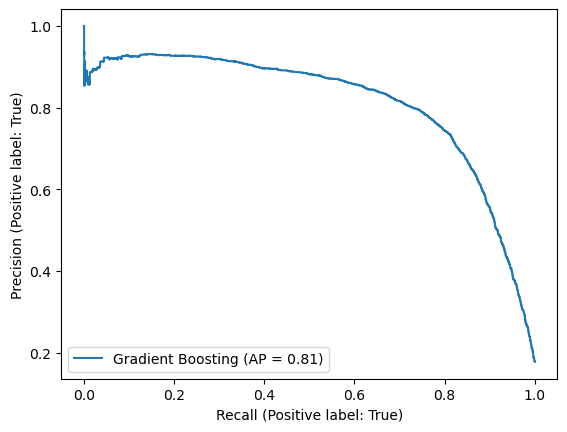

In [29]:
# precision recall
gbm_prec_recall = metrics.plot_precision_recall_curve(gbm, X_test, y_test, name = "Gradient Boosting")
plt.show()

Overall accuracy: 0.8020246353026347


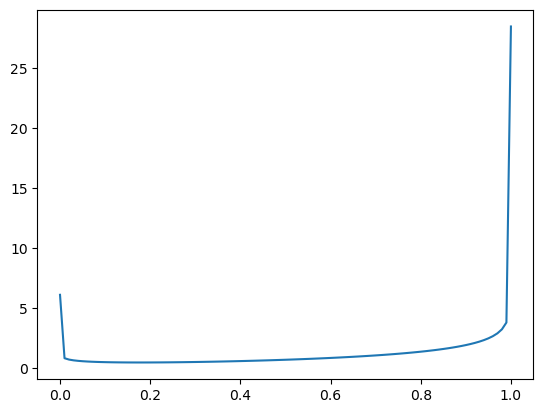

In [30]:
import math

gbm_log_loss = gbm_scores['log_loss']

# overall accuracy
print("Overall accuracy: {0}".format(math.exp(-gbm_log_loss)))

# Probability values: 0 to 1 in 0.01 increments.
prob_increments = [x*0.01 for x in range(0, 101)]

# Loss for predicting different fixed probability values.
losses_ex = [metrics.log_loss(y_test, [y for x in range(len(y_test))]) for y in prob_increments]

# Plot predictions vs loss.
plt.plot(prob_increments, losses_ex)
plt.show()